# check the scatter plot of iter-0 of two metrics

In [8]:
import numpy as np
import os, glob, sys, toml
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from matplotlib.colors import LogNorm

# Load data

In [9]:
# basin info
file = '/glade/work/guoqiang/CTSM_CAMELS/data_mesh_surf/HillslopeHydrology/CAMELS_level1_basin_info.csv'
df_info = pd.read_csv(file)

lat = df_info['lat_cen'].values
lon = df_info['lon_cen'].values

In [22]:
inpath = '/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange'
basinnum = 627
iternum = 1
trialnum = 400 + (iternum-1)*20

# 2: GPR, RF; 
emulator_metrics = np.nan * np.zeros([basinnum, iternum, 2]) 

model_metrics = np.nan * np.zeros([basinnum, trialnum, 3]) # metric-1, metric-2, iter 


for i in range(basinnum):

    flag = 0
    for j in range(iternum):
        # emulator metrics
        infiles_ij = [f'{inpath}/level1_{i}_MOASMOcalib/param_sets/GPR_for_iter{j}_CV_kge.csv', 
                      f'{inpath}/level1_{i}_MOASMOcalib/param_sets/RF_for_iter{j}_CV_kge.csv']
        for p in range(2):
            infile_ijp = infiles_ij[p]

            for q in range(6, 0, -1):
                infileq = infile_ijp.replace(f'iter{j}', f'iter{j}_try{q}')
                if os.path.isfile(infileq):
                    print('replace raw gpr emulator')
                    infile_ijp = infileq
                    break
            
            df = pd.read_csv(infile_ijp)
            emulator_metrics[i, j, p] = df['kge_mean'].values[-1]
        
        # ctsm model metrics
        filemet = f'{inpath}/level1_{i}_MOASMOcalib/ctsm_outputs/iter{j}_all_metric.csv'
        dfi = pd.read_csv(filemet)
        dfi['iter'] = j

        model_metrics[i, flag:flag+len(dfi), :] = dfi.values

        flag = flag+len(dfi)
        

replace raw gpr emulator
replace raw gpr emulator
replace raw gpr emulator
replace raw gpr emulator
replace raw gpr emulator
replace raw gpr emulator
replace raw gpr emulator
replace raw gpr emulator
replace raw gpr emulator
replace raw gpr emulator
replace raw gpr emulator
replace raw gpr emulator
replace raw gpr emulator
replace raw gpr emulator
replace raw gpr emulator
replace raw gpr emulator
replace raw gpr emulator
replace raw gpr emulator
replace raw gpr emulator
replace raw gpr emulator
replace raw gpr emulator
replace raw gpr emulator
replace raw gpr emulator
replace raw gpr emulator
replace raw gpr emulator
replace raw gpr emulator
replace raw gpr emulator
replace raw gpr emulator
replace raw gpr emulator
replace raw gpr emulator
replace raw gpr emulator


325 3
326 18
327 20
328 13
329 25
346 2
352 10
353 7
355 6
360 8
361 9
380 7
381 14
461 7
464 28
484 7
485 4
486 4
492 1
499 2
504 14


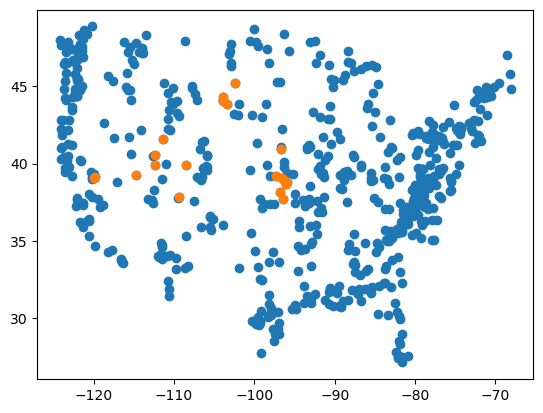

In [23]:
failb = []
failn = []
for i in range(basinnum):
    d = np.sum(np.isnan(model_metrics[i, :, 0]))
    if d>0:
        failb.append(i)
        failn.append(d)
        print(i, d)

failb = np.array(failb)
plt.scatter(lon, lat)
plt.scatter(lon[failb], lat[failb])
plt.show()

# Emulator performance

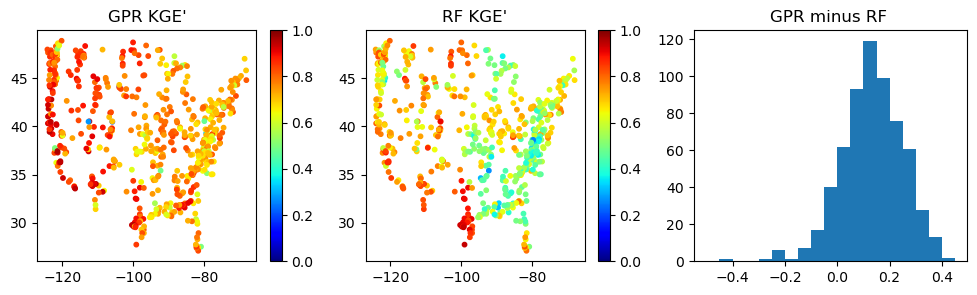

In [24]:


fig = plt.figure(figsize=[12, 3])

fig.add_subplot(1,3,1)
plt.scatter(lon, lat, 10, emulator_metrics[:,0,0], cmap='jet', vmin=0, vmax=1)
plt.colorbar()
plt.title("GPR KGE'")

fig.add_subplot(1,3,2)
plt.scatter(lon, lat, 10, emulator_metrics[:,0,1], cmap='jet', vmin=0, vmax=1)
plt.colorbar()
plt.title("RF KGE'")

fig.add_subplot(1,3,3)
plt.hist(emulator_metrics[:,0,0] - emulator_metrics[:,0,1], np.arange(-0.5, 0.5, 0.05))
plt.title("GPR minus RF ")
            
plt.show()

In [25]:
print(np.sum(emulator_metrics[:,0,1]>emulator_metrics[:,0,0]))

74


number 1


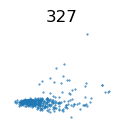

In [29]:
index = np.where(emulator_metrics[:,0,0]<0.2)[0]
print('number', len(index))

fig = plt.figure(figsize=[12, 12])
for i in range(len(index)):
    fig.add_subplot(11, 10, i+1)
    plt.scatter(model_metrics[index[i],:,0], model_metrics[index[i],:,1], 0.2)
    plt.axis('off')
    plt.title(index[i])

plt.tight_layout()
plt.show()

# Create a PDF saving all basins

In [13]:
cmap = cm.cool
norm = Normalize(vmin=0, vmax=iternum-1)  # Set the normalization from 0 to 15

values = np.linspace(0, iternum-1, iternum)
colors = cmap(norm(values))
iternames = ['defa'] + list(np.arange(iternum))

file_plot = f'camels_i0_basiccheck.pdf'
with PdfPages(file_plot) as pdf:

    for b in range(basinnum):
    # for b in range(10):
        fig = plt.figure(figsize=[10, 7])

        # 1. plot all trials
        fig.add_subplot(2,2,1)

        met1 = model_metrics[b, :, 0]
        met2 = model_metrics[b, :, 1]
        iters = model_metrics[b, :, 2]
        plt.scatter(met1, met2, 5)
        plt.xlabel('daily mean abs error (m3/s)')
        plt.ylabel('max monthly abs error (m3/s)')
        plt.title('(a) Iteration-0')

        # plot the default parameter
        plt.scatter(met1[0], met2[0], 30, marker='D', color='k')

         # 2. plot emulator performance
        fig.add_subplot(2,2,2)

        met1 = emulator_metrics[b, :, 0]
        met2 = emulator_metrics[b, :, 1]
        plt.plot(met1, '-o', label='GPR')
        plt.plot(met2, '-o', label='RF')
        # plt.ylim(0, 1)
        plt.xlabel('iteration')
        plt.ylabel("Emulator CV KGE'")
        plt.title('(b) Emulator performance')
        plt.legend()
        
        # 3. plot basin position
        fig.add_subplot(2,2,3)
        
        plt.scatter(lon, lat, s=5, color='grey')
        plt.scatter(lon[b], lat[b], s=100, color='r')
        plt.title('Basin location')

        # 4. insert text
        fig.add_subplot(2,2,4)
        plt.axis('off')
        plt.text(0.1, 0.9, f'basinid: {b}')
        s = df_info.iloc[b]['hru_id']
        plt.text(0.1, 0.8, f'hru_id: {s}')
        s = df_info.iloc[b]['lat_cen']
        plt.text(0.1, 0.7, f'lat_cen: {s}')
        s = df_info.iloc[b]['lon_cen']
        plt.text(0.1, 0.6, f'lon_cen: {s}')
        s = df_info.iloc[b]['AREA']/1e6
        plt.text(0.1, 0.5, f'AREA: {s:.2f} km2')
        s = df_info.iloc[b]['elev_mean']
        plt.text(0.1, 0.4, f'elev_mean: {s:.2f} m')


        plt.tight_layout()
        pdf.savefig(fig)  # Save the current figure into the PDF
        plt.close(fig)  # Close the figure to free memory